# Deep Learning Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install numpy opencv-python tensorflow matplotlib seaborn scikit-learn

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import cv2

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#  1. Loadtheimages.
# 2. Discard images that correspond to ages outside the range [10, 90].

In [ ]:
def load_and_preprocess_data(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')

    images = []
    ages = []

    dataset_folder ="/content/drive/MyDrive/FCAI /utkcropped"

    # Walk through extracted directory
    for filename in os.listdir(dataset_folder):
        if filename.endswith('.jpg'):
            parts = filename.split('_')
            try:
                age = int(parts[0])

                if 10 <= age <= 90:
                    img_path = os.path.join(dataset_folder, filename)
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (64, 64))

                    images.append(img)
                    ages.append(age)
            except ValueError:
                continue

    X = np.array(images) / 255.0
    y = np.array(ages)

    return X, y

## Pre Model

In [ ]:
# Split the data
def split_data(X, y, test_size=0.2, val_size=0.2):
    from sklearn.model_selection import train_test_split

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, data_augmentation=None):
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.00001
    )

    # Training
    if data_augmentation:
        history = model.fit(
            data_augmentation.flow(X_train, y_train, batch_size=32),
            validation_data=(X_val, y_val),
            epochs=10,
            callbacks=[early_stopping, reduce_lr]
        )
    else:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=20,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr]
        )

    return history

In [ ]:
def plot_training_history(histories, model_names):
    plt.figure(figsize=(15, 5))

    # Training Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} Training Loss')
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')

    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Two large convolutional neural network (CNN) models with custom architectures.

## Modle 1

In [ ]:
# Custom CNN Model 1: Deep CNN
def create_deep_cnn_model1(input_shape=(64, 64, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

In [ ]:
def main():
    zip_file_path = "/content/drive/MyDrive/FCAI /DL_Assignment 1.zip"
    X, y = load_and_preprocess_data(zip_file_path)

    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

    model = create_deep_cnn_model1()
    history = train_model(model, X_train, y_train, X_val, y_val)

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate Model
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Absolute Error: {test_mae}")

Epoch 1/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 13.5787 - mae: 12.9609 - val_loss: 17.2450 - val_mae: 16.6422 - learning_rate: 0.0010
Epoch 2/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 10.5029 - mae: 9.8816 - val_loss: 12.0934 - val_mae: 11.4556 - learning_rate: 0.0010
Epoch 3/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.6632 - mae: 9.0219 - val_loss: 11.4303 - val_mae: 10.7726 - learning_rate: 0.0010
Epoch 4/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.1362 - mae: 8.4724 - val_loss: 16.3225 - val_mae: 15.6367 - learning_rate: 0.0010
Epoch 5/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.9382 - mae: 8.2471 - val_loss: 11.7494 - val_mae: 11.0350 - learning_rate: 0.0010
Epoch 6/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.5419 - mae: 7.8207 - val_loss: 12.8146 - val_mae: 12.0667 - learning_rate: 0.0010
Epoch 7/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.6754 - mae: 6.9324 - val_loss: 7.6619 - val_mae: 6.9365 - learning_ra

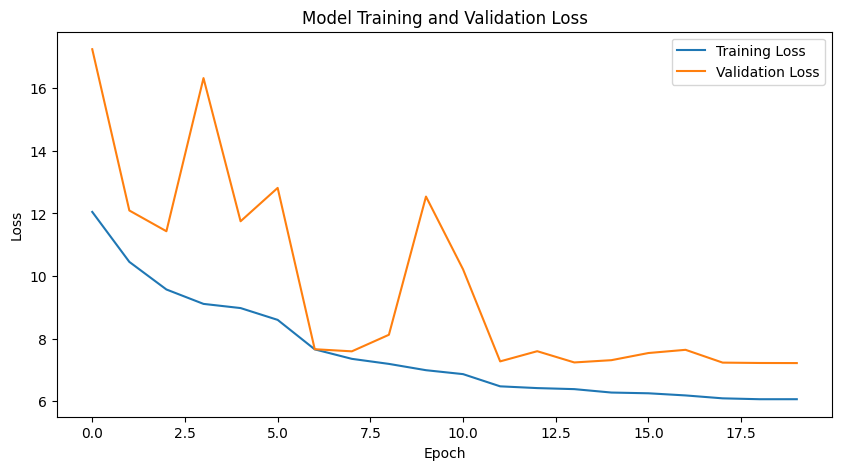

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.0537 - mae: 6.4176
Test Mean Absolute Error: 6.466558933258057


In [ ]:
main()

## Modle 2

In [ ]:
def create_deep_cnn_model2(input_shape=(64, 64, 3)):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(512, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(1024, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

In [ ]:
def main1():

    zip_file_path = "/content/drive/MyDrive/FCAI /DL_Assignment 1.zip"
    X, y = load_and_preprocess_data(zip_file_path)

    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

    model = create_deep_cnn_model2()
    history = train_model(model, X_train, y_train, X_val, y_val)

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Absolute Error: {test_mae}")

Epoch 1/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 14.8094 - mae: 12.9078 - val_loss: 17.4319 - val_mae: 15.8284 - learning_rate: 0.0010
Epoch 2/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 11.5735 - mae: 10.0127 - val_loss: 12.8345 - val_mae: 11.3713 - learning_rate: 0.0010
Epoch 3/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 10.4723 - mae: 9.0078 - val_loss: 23.0845 - val_mae: 21.6226 - learning_rate: 0.0010
Epoch 4/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 9.8285 - mae: 8.3586 - val_loss: 12.6209 - val_mae: 11.1703 - learning_rate: 0.0010
Epoch 5/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 9.6331 - mae: 8.1867 - val_loss: 15.2241 - val_mae: 13.8023 - learning_rate: 0.0010
Epoch 6/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 9.1898 - mae: 7.7628 - val_loss: 12.5908 - val_mae: 11.1641 - learning_rate: 0.0010
Epoch 7/20
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 8.9211 - mae: 7.4893 - val_loss: 9.6938 - val_mae: 8.2452 - lea

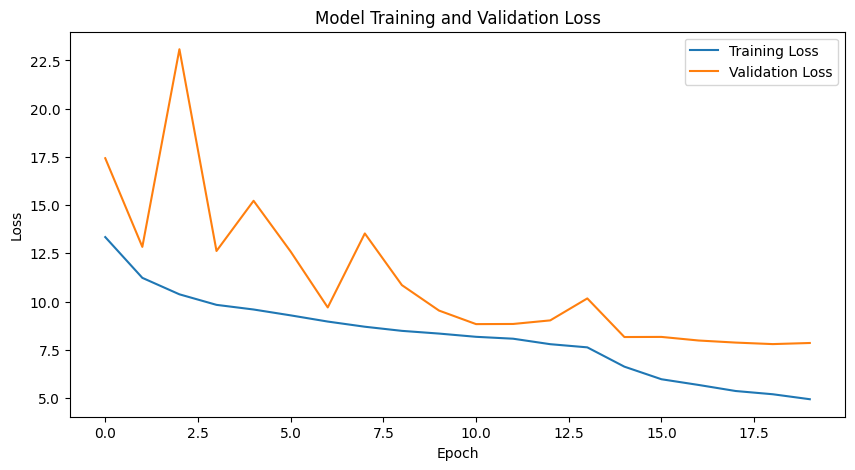

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.6636 - mae: 6.2959
Test Mean Absolute Error: 6.37539005279541


In [ ]:
main1()

#Two smaller models that apply transfer learning by taking the features  extracted by a base CNN model of a well-known architecture as their input, and learning to leverage these features for the age estimation task.

# ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def load_and_preprocess_data(zip_file_path):

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')

    images = []
    ages = []

    dataset_folder =r"/content/drive/MyDrive/FCAI /utkcropped"

    for filename in os.listdir(dataset_folder):
        if filename.endswith('.jpg'):
            parts = filename.split('_')
            try:
                age = int(parts[0])
                if 10 <= age <= 90:
                    img_path = os.path.join(dataset_folder, filename)
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (64, 64))

                    images.append(img)
                    ages.append(age)
            except ValueError:
                continue

    X = np.array(images) / 255.0
    y = np.array(ages)

    return X, y




In [ ]:
def create_transfer_learning_model2(input_shape=(64, 64, 3)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.6),
        layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model


In [ ]:
def split_data(X, y, test_size=0.2, val_size=0.2):
    from sklearn.model_selection import train_test_split

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test



In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, data_augmentation=None):
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2,
        min_lr=1e-6
    )

    if data_augmentation:
        history = model.fit(
            data_augmentation.flow(X_train, y_train, batch_size=32),
            validation_data=(X_val, y_val),
            epochs=10,
            callbacks=[early_stopping, reduce_lr]
        )
    else:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr]
        )

    return history


In [ ]:
def main3():
    zip_file_path = r"/content/drive/MyDrive/FCAI /DL_Assignment 1.zip"
    X, y = load_and_preprocess_data(zip_file_path)

    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

    model = create_transfer_learning_model2()
    history = train_model(model, X_train, y_train, X_val, y_val)

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Absolute Error: {test_mae}")

    model.save("age_prediction_model.h5")
    print("Model saved as 'age_prediction_model.h5'.")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - loss: 13.6702 - mae: 12.9076 - val_loss: 20.1047 - val_mae: 19.6905 - learning_rate: 0.0010
Epoch 2/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 79s 52ms/step - loss: 9.4550 - mae: 9.1017 - val_loss: 13.0077 - val_mae: 12.7903 - learning_rate: 0.0010
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - loss: 8.2578 - mae: 8.0673 - val_loss: 8.6964 - val_mae: 8.5677 - learning_rate: 0.0010
Epoch 4/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - loss: 7.9392 - mae: 7.8233 - val_loss: 12.0236 - val_mae: 11.9364 - learning_rate: 0.0010
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - loss: 7.8534 - mae: 7.7737 - val_loss: 10.2247 - val_mae: 10.1627 - learning_rate: 0.0010
Epoch 6/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - loss: 6.8093 - mae: 6.7487 - val_loss: 5.9902 - val_mae: 5.9335 - learning_rate: 2.0000e-04
Epoch 7/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 6.0977 

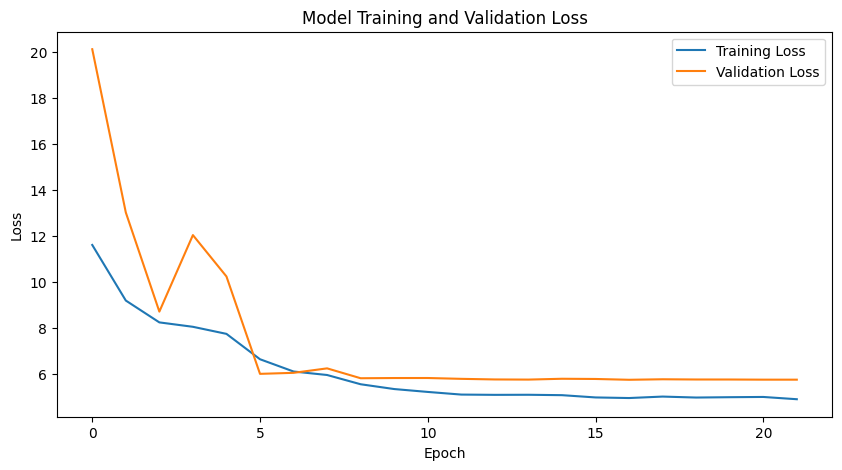

129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 5.5172 - mae: 5.4754


Test Mean Absolute Error: 5.554823398590088
Model saved as 'age_prediction_model.h5'.


In [ ]:
main3()


# VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def load_and_preprocess_data(zip_file_path):

    images = []
    ages = []

    dataset_folder ='/content/drive/MyDrive/faces/utkcropped'

    for filename in os.listdir(dataset_folder):
        if filename.endswith('.jpg'):

            parts = filename.split('_')
            try:
                age = int(parts[0])

                if 10 <= age <= 90:
                    img_path = os.path.join(dataset_folder, filename)
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (64, 64))

                    images.append(img)
                    ages.append(age)
            except ValueError:
                continue

    X = np.array(images) / 255.0
    y = np.array(ages)

    return X, y


In [ ]:
def create_transfer_learning_model1(input_shape=(64, 64, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model


def split_data(X, y, test_size=0.2, val_size=0.2):
    from sklearn.model_selection import train_test_split

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test



In [ ]:

def train_model(model, X_train, y_train, X_val, y_val, data_augmentation=None):

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2,
        min_lr=1e-6
    )

    if data_augmentation:
        history = model.fit(
            data_augmentation.flow(X_train, y_train, batch_size=32),
            validation_data=(X_val, y_val),
            epochs=10,
            callbacks=[early_stopping, reduce_lr]
        )
    else:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr]
        )

    return history

In [ ]:
def main2():
    # Load Data
    zip_file_path = '/content/drive/MyDrive/faces/utkcropped'
    X, y = load_and_preprocess_data(zip_file_path)

    # Split Data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

    # Create and Train Model
    model = create_transfer_learning_model1()
    history = train_model(model, X_train, y_train, X_val, y_val)

    # Plot Training History
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate Model
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Absolute Error: {test_mae}")
    model.save("age_prediction_model.h5")
    print("Model saved as 'age_prediction_model.h5'")

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - loss: 26.2351 - mae: 25.8795 - val_loss: 2.7915 - val_mae: 2.5894 - learning_rate: 0.0010
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 3.4029 - mae: 3.2133 - val_loss: 2.7918 - val_mae: 2.6265 - learning_rate: 0.0010
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 3.4092 - mae: 3.2490 - val_loss: 2.7893 - val_mae: 2.6427 - learning_rate: 0.0010
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 3.2943 - mae: 3.1513 - val_loss: 2.7393 - val_mae: 2.6064 - learning_rate: 0.0010
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 3.3194 - mae: 3.1894 - val_loss: 2.7340 - val_mae: 2.6119 - learning_rate: 0.0010
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 3.3952 - mae: 3.2754 - val_loss: 2.8936 - val_mae: 2.7807 - learning_rate: 0.0010
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.2434 - mae: 3.1317 - val_loss: 2.8970 - val_mae: 2.7908 - learning_rate: 0.0010
Epoch 8/5

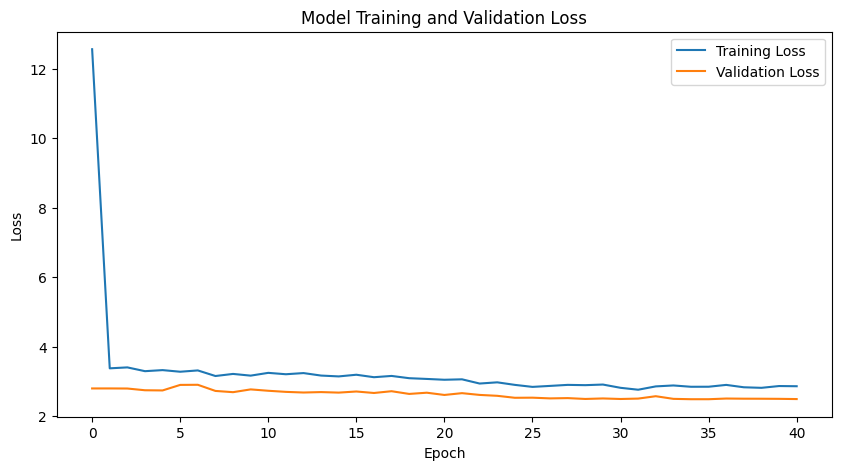

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.4259 - mae: 2.3308


Test Mean Absolute Error: 2.340360403060913
Model saved as 'age_prediction_model.h5'


In [ ]:
main2()


# 8. Select the best model, use it to make age predictions on face images of your team, and plot these images with the estimated ages.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


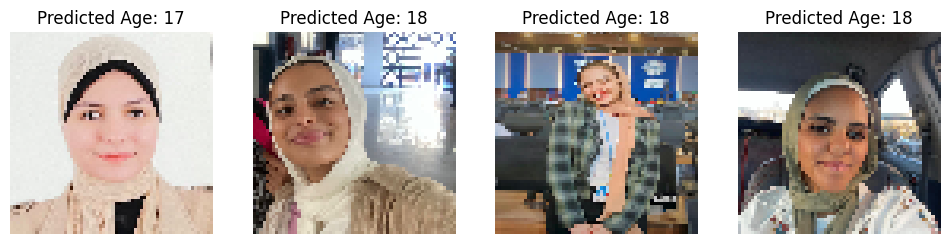

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_and_visualize(model_path, image_paths):

    model = tf.keras.models.load_model(model_path)

    images = []
    valid_image_paths = []

    for img_path in image_paths:
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        images.append(img)
        valid_image_paths.append(img_path)

    if not images:
        print("No valid images to process.")
        return

    images = np.array(images) / 255.0

    predictions = model.predict(images)
    predicted_ages = predictions.flatten()

    plt.figure(figsize=(12, 6))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(f"Predicted Age: {int(predicted_ages[i])}")
        plt.axis('off')
    plt.show()

image_paths = [
"/content/Menna.jpg",
    "/content/Mariam.jpg",
    "/content/jana.jpg",
    "/content/Zaynab.jpg"
]

predict_and_visualize("age_prediction_model.h5",image_paths)


# VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os  # Import the os module
from tensorflow.keras.applications import VGG16, ResNet50
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import cv2

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
def load_and_preprocess_data(zip_file_path):

    images = []
    ages = []

    dataset_folder ='/content/drive/MyDrive/FCAI /utkcropped'

    for filename in os.listdir(dataset_folder):
        if filename.endswith('.jpg'):

            parts = filename.split('_')
            try:
                age = int(parts[0])

                if 10 <= age <= 90:
                    img_path = os.path.join(dataset_folder, filename)
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (64, 64))

                    images.append(img)
                    ages.append(age)
            except ValueError:
                continue

    X = np.array(images) / 255.0
    y = np.array(ages)

    return X, y


In [ ]:
def create_transfer_learning_model1(input_shape=(64, 64, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model


def split_data(X, y, test_size=0.2, val_size=0.2):
    from sklearn.model_selection import train_test_split

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test



In [ ]:

def train_model(model, X_train, y_train, X_val, y_val, data_augmentation=None):

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2,
        min_lr=1e-6
    )

    if data_augmentation:
        history = model.fit(
            data_augmentation.flow(X_train, y_train, batch_size=32),
            validation_data=(X_val, y_val),
            epochs=10,
            callbacks=[early_stopping, reduce_lr]
        )
    else:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr]
        )

    return history

In [ ]:
import cv2 # Import the OpenCV library
import numpy as np #Import the numpy Library

In [ ]:
def main2():
    # Load Data
    zip_file_path = '/content/drive/MyDrive/FCAI /DL_Assignment 1.zip'
    X, y = load_and_preprocess_data(zip_file_path)

    # Split Data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

    # Create and Train Model
    model = create_transfer_learning_model1()
    history = train_model(model, X_train, y_train, X_val, y_val)

    # Plot Training History
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate Model
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Absolute Error: {test_mae}")
    model.save("age_prediction_model.h5")
    print("Model saved as 'age_prediction_model.h5'")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 54s 98ms/step - loss: 24.1014 - mae: 23.8853 - val_loss: 13.4696 - val_mae: 13.3534 - learning_rate: 0.0010
Epoch 2/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - loss: 13.3339 - mae: 13.2258 - val_loss: 13.4993 - val_mae: 13.4077 - learning_rate: 0.0010
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - loss: 13.3378 - mae: 13.2460 - val_loss: 12.7734 - val_mae: 12.6873 - learning_rate: 0.0010
Epoch 4/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 12.3991 - mae: 12.3128 - val_loss: 10.1688 - val_mae: 10.0839 - learning_rate: 0.0010
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - loss: 10.5264 - mae: 10.4438 - val_loss: 9.8306 - val_mae: 9.7496 - learning_rate: 0.0010
Epoch 6/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - loss: 9.4403 - mae: 9.3630 - val_loss: 8.5121 - val_mae: 8.4421 - learning_rate: 0.0010
Epoch 7/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - loss: 8.605

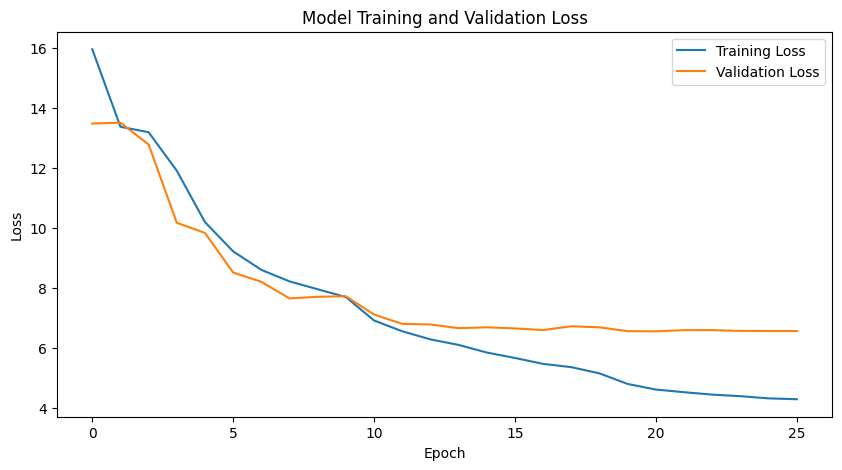

129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 6.3550 - mae: 6.3198


Test Mean Absolute Error: 6.368239879608154
Model saved as 'age_prediction_model.h5'


In [ ]:
main2()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


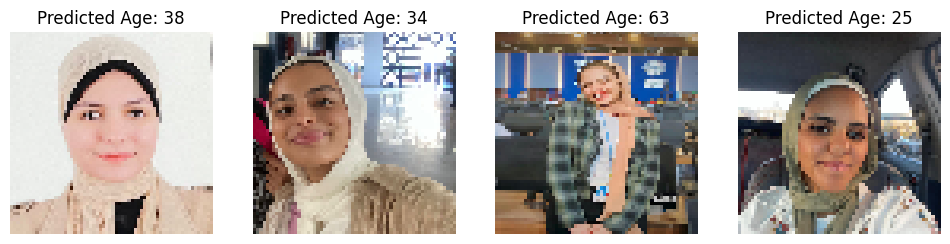

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_and_visualize(model_path, image_paths):

    model = tf.keras.models.load_model(model_path)

    images = []
    valid_image_paths = []

    for img_path in image_paths:
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        images.append(img)
        valid_image_paths.append(img_path)

    if not images:
        print("No valid images to process.")
        return

    images = np.array(images) / 255.0

    predictions = model.predict(images)
    predicted_ages = predictions.flatten()

    plt.figure(figsize=(12, 6))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(f"Predicted Age: {int(predicted_ages[i])}")
        plt.axis('off')
    plt.show()

image_paths = [
"/content/Menna.jpg",
    "/content/Mariam.jpg",
    "/content/Jana.jpg",
    "/content/Zaynab.jpg"
]

predict_and_visualize("age_prediction_model.h5",image_paths)
